seminarska PR - prometne nesreče

analiza okoliščin prometnih nesreč - 2019

Branje podatkov iz pn2019.csv, ter karatek prikaz delajvnikov kjer so prometne nesreče najbolj pogoste

In [4]:
import numpy as np
import numpy.lib.recfunctions as rfn
from numpy import genfromtxt
import matplotlib.pyplot as plt
from csv import DictReader
from datetime import datetime
import operator

In [5]:
#Branje podatkov za okoliščine nesreč
#Za druge vprašanje raje naredi novo branje, ker bo manjši glavobol.
#Plus podatkov je preveč, da bi se mi dalo od vsakega poiskati string v datoteki, če se ti, da 32 copy and paste delat.
#si dobrotošel da poskusiš aja pa še manj pregledno je če je vseh 32 podatkov

dataOkoliscine=None
dataOkoliscineGroup=None
reader = DictReader(open('podatki/pn2019.csv', 'rt'),delimiter=';')

vrsteLokacijNesrec=dict()
vrsteCestNesrec=dict()
vrstaOdsekaCestNesrec=dict()
stanjaPrometaNesrec=dict()
stanjeVoziscaNesrec=dict()
vrsteVoziscaNesrec=dict()
casPoUrah=dict()
casPoMesec=dict()
letniCasNesrece={"poletje":0,"zima":0,"pomald":0,"jesen":0}
dnevniCasNesrece={"jutro":0,"dopoldne":0,"popoldne":0,"vecer":0}

letniCas=None
dnevniCas=None
zeObiskaneNesrece=set()


In [6]:

for row in reader:
    
    datum=row["DatumPN"]
    ura=row["UraPN"]
    lokacija=row["Lokacija"]
    vrstaCeste=row["VrstaCesteNaselja"]
    vrstaOdsekaCeste=row["OpisKraja"]
    stanjeP=row["StanjePrometa"]
    stanjeV=row["StanjeVozisca"]
    vrstaVozisca=row["VrstaVozisca"]
    
    
    #sestavljeni atribut za letni čas
    if int(datum.split(".")[1])==12 or int(datum.split(".")[1])==1 or int(datum.split(".")[1])==2:
        letniCasNesrece["zima"]+=1
    elif int(datum.split(".")[1])==3 or int(datum.split(".")[1])==4 or int(datum.split(".")[1])==5:
        letniCasNesrece["pomald"]+=1
    elif int(datum.split(".")[1])==6 or int(datum.split(".")[1])==7 or int(datum.split(".")[1])==8:
        letniCasNesrece["poletje"]+=1
    else:
         letniCasNesrece["jesen"]+=1
            
    #sestavljen atribut za čas v dnevu
    if int(ura.split(".")[0])<6 and int(datum.split(".")[0])>=0:
        dnevniCasNesrece["jutro"]+=1
    elif int(ura.split(".")[0])<12 and int(datum.split(".")[0])>=6:
        dnevniCasNesrece["dopoldne"]+=1
    elif int(ura.split(".")[0])<18 and int(datum.split(".")[0])>=12:
        dnevniCasNesrece["popoldne"]+=1
    else:
         dnevniCasNesrece["vecer"]+=1
    
    #vse vrste in njihove pojavitve se hranijo v spodnjih dict
    if lokacija not in vrsteLokacijNesrec.keys():
        vrsteLokacijNesrec[lokacija]=1
    else:
        vrsteLokacijNesrec[lokacija]+=1
    
    if vrstaCeste not in vrsteCestNesrec.keys():
        vrsteCestNesrec[vrstaCeste]=1
    else:
        vrsteCestNesrec[vrstaCeste]+=1
        
    if vrstaOdsekaCeste not in vrstaOdsekaCestNesrec.keys():
        vrstaOdsekaCestNesrec[vrstaOdsekaCeste]=1
    else:
        vrstaOdsekaCestNesrec[vrstaOdsekaCeste]+=1
        
    if stanjeP not in stanjaPrometaNesrec.keys():
        stanjaPrometaNesrec[stanjeP]=1
    else:
        stanjaPrometaNesrec[stanjeP]+=1
      
    if stanjeV not in stanjeVoziscaNesrec.keys():
        stanjeVoziscaNesrec[stanjeV]=1
    else:
        stanjeVoziscaNesrec[stanjeV]+=1
    
    if vrstaVozisca not in vrsteVoziscaNesrec.keys():
        stanjeVoziscaNesrec[vrstaVozisca]=1
    else:
        stanjeVoziscaNesrec[vrstaVozisca]+=1
        
    if(int(ura.split(".")[0]) not in casPoUrah.keys()):
        casPoUrah[int(ura.split(".")[0])]=1
    else:
        casPoUrah[int(ura.split(".")[0])]+=1
        
    if(int(datum.split(".")[1]) not in casPoMesec.keys()):
        casPoMesec[int(datum.split(".")[1])]=1
    else:
        casPoMesec[int(datum.split(".")[1])]+=1
    
    if(dataOkoliscine is None):
        dataOkoliscine = np.array([lokacija,ura, datum,vrstaCeste,vrstaCeste,stanjeP,stanjeV,vrstaVozisca])
    elif row["ZaporednaStevilkaPN"] not in zeObiskaneNesrece:
        zeObiskaneNesrece.add(row["ZaporednaStevilkaPN"])
        dataOkoliscine = np.vstack([dataOkoliscine, [lokacija,ura, datum,vrstaCeste,vrstaCeste,stanjeP,stanjeV,vrstaVozisca]])

In [5]:
dataOkoliscine

array([['NASELJE', '13.15', '08.01.2019', ..., 'GOST', 'MOKRO',
        'ZGLAJEN ASFALT / BETON'],
       ['NASELJE', '13.15', '08.01.2019', ..., 'GOST', 'MOKRO',
        'ZGLAJEN ASFALT / BETON'],
       ['NASELJE', '05.55', '02.01.2019', ..., 'REDEK', 'SPOLZKO',
        'HRAPAV  ASFALT / BETON'],
       ...,
       ['NASELJE', '09.50', '21.11.2019', ..., 'GOST', 'MOKRO',
        'ZGLAJEN ASFALT / BETON'],
       ['NASELJE', '21.10', '16.11.2019', ..., 'NEZNANO', 'MOKRO',
        'ZGLAJEN ASFALT / BETON'],
       ['NASELJE', '09.00', '25.08.2019', ..., 'NORMALEN', 'SUHO',
        'ZGLAJEN ASFALT / BETON']], dtype='<U29')

In [6]:
stanjeVoziscaNesrec

{'MOKRO': 7616,
 'ZGLAJEN ASFALT / BETON': 1,
 'SPOLZKO': 496,
 'HRAPAV  ASFALT / BETON': 1,
 'SUHO': 25369,
 'SNEŽENO - NEPLUŽENO': 138,
 'POLEDENELO - NEPOSIPANO': 37,
 'MAKADAM': 1,
 'OSTALO': 1,
 'POLEDENELO - POSIPANO': 40,
 'NERAVEN ASFALT / BETON': 1,
 'SNEŽENO - PLUŽENO': 74,
 'BLATNO': 9}

In [1]:
#Top 3 za vsako kategorijo okoliščin razen mesec in čas
#p.s izpis si lohk narediš sam

#sorteranje dict-a za stanje ceste
print("Stanje cest:",{k: v for k, v in sorted(stanjeVoziscaNesrec.items(), key=lambda item: item[1],reverse=True)})

#sorteranje dict-a za vrsto ceste
print("vrsto ceste:",{k: v for k, v in sorted(vrsteCestNesrec.items(), key=lambda item: item[1],reverse=True)})

#sorteranje dict-a za lokacijo samo dve vrsti naselje ali cesta tako, da je samo top 2
print("vrsta lokacije:",{k: v for k, v in sorted(vrsteLokacijNesrec.items(), key=lambda item: item[1],reverse=True)})

#sorteranje dict-a za vrsta odseka
print("vrsta odseka:",{k: v for k, v in sorted(vrstaOdsekaCestNesrec.items(), key=lambda item: item[1],reverse=True)})

#sorteranje dict-a za vrsta odseka
print("gostost prometa:",{k: v for k, v in sorted(stanjaPrometaNesrec.items(), key=lambda item: item[1],reverse=True)})

#sorteranje dict-a za letni čas
print("letni časi:",{k: v for k, v in sorted(letniCasNesrece.items(), key=lambda item: item[1],reverse=True)})

#sorteranje dict-a za čas v dnevu
print("skozi dan:",{k: v for k, v in sorted(dnevniCasNesrece.items(), key=lambda item: item[1],reverse=True)})




NameError: name 'stanjeVoziscaNesrec' is not defined

<BarContainer object of 24 artists>

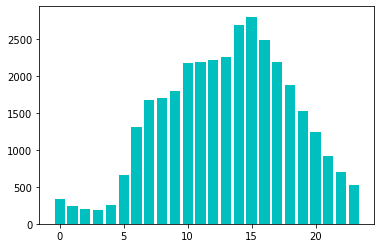

In [13]:
#Izris porazdelitve po času v dnevu
sorted_casPoUrah = sorted(casPoUrah.items(), key=operator.itemgetter(0))
y_axis=[]
x_axis=[]
for par in sorted_casPoUrah:
    y_axis.append(par[1])
    x_axis.append(par[0])

plt.bar(x_axis, y_axis, color='c')

<BarContainer object of 12 artists>

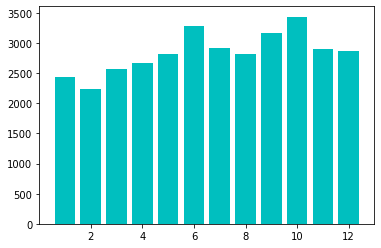

In [14]:
sorted_casPoMesec = sorted(casPoMesec.items(), key=operator.itemgetter(0))
y_axis=[]
x_axis=[]
for par in sorted_casPoMesec:
    y_axis.append(par[1])
    x_axis.append(par[0])

plt.bar(x_axis, y_axis, color='c')

Pozneje bo sledilo še gručenje

Osnovna analiza za 2020

In [36]:
dataOkoliscine=None
dataOkoliscineGroup=None
reader = DictReader(open('podatki/pn2020.csv', 'rt'),delimiter=';')

vrsteLokacijNesrec2=dict()
vrsteCestNesrec2=dict()
vrstaOdsekaCestNesrec2=dict()
stanjaPrometaNesrec2=dict()
stanjeVoziscaNesrec2=dict()
vrsteVoziscaNesrec2=dict()
casPoUrah2=dict()
casPoMesec2=dict()
letniCasNesrece2={"poletje":0,"zima":0,"pomald":0,"jesen":0}
dnevniCasNesrece2={"jutro":0,"dopoldne":0,"popoldne":0,"vecer":0}

letniCas=None
dnevniCas=None
zeObiskaneNesrece=set()

In [37]:
for row in reader:
    
    datum=row["DatumPN"]
    ura=row["UraPN"]
    lokacija=row["Lokacija"]
    vrstaCeste=row["VrstaCesteNaselja"]
    vrstaOdsekaCeste=row["OpisKraja"]
    stanjeP=row["StanjePrometa"]
    stanjeV=row["StanjeVozisca"]
    vrstaVozisca=row["VrstaVozisca"]
    
    
    #sestavljeni atribut za letni čas
    if int(datum.split(".")[1])==12 or int(datum.split(".")[1])==1 or int(datum.split(".")[1])==2:
        letniCasNesrece2["zima"]+=1
    elif int(datum.split(".")[1])==3 or int(datum.split(".")[1])==4 or int(datum.split(".")[1])==5:
        letniCasNesrece2["pomald"]+=1
    elif int(datum.split(".")[1])==6 or int(datum.split(".")[1])==7 or int(datum.split(".")[1])==8:
        letniCasNesrece2["poletje"]+=1
    else:
         letniCasNesrece2["jesen"]+=1
            
    #sestavljen atribut za čas v dnevu
    if int(ura.split(".")[0])<6 and int(datum.split(".")[0])>=0:
        dnevniCasNesrece2["jutro"]+=1
    elif int(ura.split(".")[0])<12 and int(datum.split(".")[0])>=6:
        dnevniCasNesrece2["dopoldne"]+=1
    elif int(ura.split(".")[0])<18 and int(datum.split(".")[0])>=12:
        dnevniCasNesrece2["popoldne"]+=1
    else:
         dnevniCasNesrece2["vecer"]+=1
    
    #vse vrste in njihove pojavitve se hranijo v spodnjih dict
    if lokacija not in vrsteLokacijNesrec2.keys():
        vrsteLokacijNesrec2[lokacija]=1
    else:
        vrsteLokacijNesrec2[lokacija]+=1
    
    if vrstaCeste not in vrsteCestNesrec2.keys():
        vrsteCestNesrec2[vrstaCeste]=1
    else:
        vrsteCestNesrec2[vrstaCeste]+=1
        
    if vrstaOdsekaCeste not in vrstaOdsekaCestNesrec2.keys():
        vrstaOdsekaCestNesrec2[vrstaOdsekaCeste]=1
    else:
        vrstaOdsekaCestNesrec2[vrstaOdsekaCeste]+=1
        
    if stanjeP not in stanjaPrometaNesrec2.keys():
        stanjaPrometaNesrec2[stanjeP]=1
    else:
        stanjaPrometaNesrec2[stanjeP]+=1
      
    if stanjeV not in stanjeVoziscaNesrec2.keys():
        stanjeVoziscaNesrec2[stanjeV]=1
    else:
        stanjeVoziscaNesrec2[stanjeV]+=1
    
    if vrstaVozisca not in vrsteVoziscaNesrec2.keys():
        stanjeVoziscaNesrec2[vrstaVozisca]=1
    else:
        stanjeVoziscaNesrec2[vrstaVozisca]+=1
        
    if(int(ura.split(".")[0]) not in casPoUrah2.keys()):
        casPoUrah2[int(ura.split(".")[0])]=1
    else:
        casPoUrah2[int(ura.split(".")[0])]+=1
        
    if(int(datum.split(".")[1]) not in casPoMesec2.keys()):
        casPoMesec2[int(datum.split(".")[1])]=1
    else:
        casPoMesec2[int(datum.split(".")[1])]+=1
    
    if(dataOkoliscine is None):
        dataOkoliscine = np.array([lokacija,ura, datum,vrstaCeste,vrstaCeste,stanjeP,stanjeV,vrstaVozisca])
    elif row["ZaporednaStevilkaPN"] not in zeObiskaneNesrece:
        zeObiskaneNesrece.add(row["ZaporednaStevilkaPN"])
        dataOkoliscine = np.vstack([dataOkoliscine, [lokacija,ura, datum,vrstaCeste,vrstaCeste,stanjeP,stanjeV,vrstaVozisca]])

In [38]:
print("Stanje cest:",{k: v for k, v in sorted(stanjeVoziscaNesrec2.items(), key=lambda item: item[1],reverse=True)})

#sorteranje dict-a za vrsto ceste
print("vrsto ceste:",{k: v for k, v in sorted(vrsteCestNesrec2.items(), key=lambda item: item[1],reverse=True)})

#sorteranje dict-a za lokacijo samo dve vrsti naselje ali cesta tako, da je samo top 2
print("vrsta lokacije:",{k: v for k, v in sorted(vrsteLokacijNesrec2.items(), key=lambda item: item[1],reverse=True)})

#sorteranje dict-a za vrsta odseka
print("vrsta odseka:",{k: v for k, v in sorted(vrstaOdsekaCestNesrec2.items(), key=lambda item: item[1],reverse=True)})

#sorteranje dict-a za vrsta odseka
print("gostost prometa:",{k: v for k, v in sorted(stanjaPrometaNesrec2.items(), key=lambda item: item[1],reverse=True)})

#sorteranje dict-a za letni čas
print("letni časi:",{k: v for k, v in sorted(letniCasNesrece2.items(), key=lambda item: item[1],reverse=True)})

#sorteranje dict-a za čas v dnevu
print("skozi dan:",{k: v for k, v in sorted(dnevniCasNesrece2.items(), key=lambda item: item[1],reverse=True)})

Stanje cest: {'SUHO': 19726, 'MOKRO': 5243, 'SPOLZKO': 482, 'SNEŽENO - NEPLUŽENO': 90, 'POLEDENELO - NEPOSIPANO': 59, 'SNEŽENO - PLUŽENO': 58, 'POLEDENELO - POSIPANO': 14, 'BLATNO': 11, 'HRAPAV  ASFALT / BETON': 1, 'ZGLAJEN ASFALT / BETON': 1, 'MAKADAM': 1, 'OSTALO': 1, 'NERAVEN ASFALT / BETON': 1}
vrsto ceste: {'NASELJE Z ULIČNIM SISTEMOM': 13098, 'NASELJE BREZ ULIČNEGA SISTEMA': 4121, 'AVTOCESTA': 2346, 'REGIONALNA CESTA II. REDA': 1304, 'REGIONALNA CESTA': 1123, 'GLAVNA CESTA II. REDA': 1059, 'GLAVNA CESTA': 917, 'REGIONALNA CESTA III. REDA': 884, 'LOKALNA CESTA': 785, 'HITRA CESTA': 330, 'TURISTIČNA CESTA': 106}
vrsta lokacije: {'NASELJE': 17219, 'CESTA': 8854}
vrsta odseka: {'CESTA': 19145, 'PARKIRNI PROSTOR': 3176, 'KRIŽIŠČE': 2795, 'KROŽNO KRIŽIŠČE': 422, 'KOLESAR. ST. ALI PLOČNIK': 231, 'PREHOD ZA PEŠCE': 193, 'PREDOR': 56, 'ŽELEZNIŠKI PREHOD': 30, 'AVTOBUSNA POSTAJA': 22, 'NARAVOVARSTVENO OBMOČJE': 3}
gostost prometa: {'NORMALEN': 14651, 'REDEK': 6325, 'GOST': 3348, 'NEZNANO':

Text(0, 0.5, 'količina nesreč')

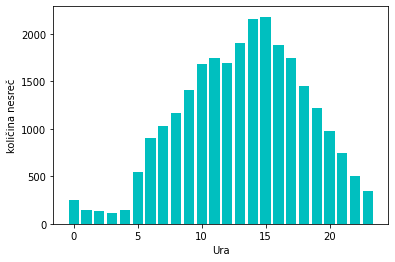

In [58]:
sorted_casPoUrah = sorted(casPoUrah.items(), key=operator.itemgetter(0))
y_axis=[]
x_axis=[]
for par in sorted_casPoUrah:
    y_axis.append(par[1])
    x_axis.append(par[0])

plt.bar(x_axis, y_axis, color='c')
plt.xlabel("Ura")
plt.ylabel("količina nesreč")

Text(0, 0.5, 'količina nesreč')

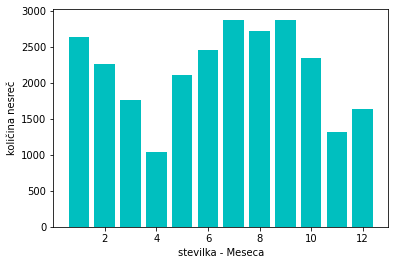

In [44]:
sorted_casPoMesec = sorted(casPoMesec.items(), key=operator.itemgetter(0))
y_axis=[]
x_axis=[]
for par in sorted_casPoMesec:
    y_axis.append(par[1])
    x_axis.append(par[0])

plt.bar(x_axis, y_axis, color='c')
plt.xlabel("stevilka - Meseca")
plt.ylabel("količina nesreč")

Vrste vontikov alnaliza - 2019

In [333]:
dataVoznik=None
reader = DictReader(open('podatki/pn2019.csv', 'rt'),delimiter=';')

zeObiskaneNesrece1=set()
vozikImelPas1=dict()
turisti=dict()
drzavljanstvo1=dict()
dopustnObdobje={"DOMACIN":0,"TUJEC":0}
spola1=dict()
poskodbe1=dict()
stopnjeZnanjaVoznika=list()
alkoVrednosti=list()
starostiPovzrociteljev=list()

In [334]:
for row in reader:
    starost=row["Starost"]
    Spol=row["Spol"]
    Drzavljanstvo=row["Drzavljanstvo"]
    PoskodbaUdelezenca=row["PoskodbaUdelezenca"]
    VrstaUdelezenca=row["VrstaUdelezenca"]
    UporabaVarnostnegaPasu=row["UporabaVarnostnegaPasu"]
    VozniskiStazVLetih=row["VozniskiStazVLetih"]
    VozniskiStazVMesecih=row["VozniskiStazVMesecih"]
    VrednostAlkotesta=row["VrednostAlkotesta"]
    VrednostStrokovnegaPregleda=row["VrednostStrokovnegaPregleda"]
    jePovzrocitel=row["Povzrocitelj"]
    datum=row["DatumPN"]
    
    if jePovzrocitel.strip()=="POVZROČITELJ":
        if Spol not in spola1.keys():
            spola1[Spol]=1
        else:
            spola1[Spol]+=1
            
        if Drzavljanstvo not in drzavljanstvo1.keys():
            drzavljanstvo1[Drzavljanstvo]=1
        else:
            drzavljanstvo1[Drzavljanstvo]+=1
        
        if Drzavljanstvo not in drzavljanstvo1.keys():
            drzavljanstvo1[Drzavljanstvo]=1
        else:
            drzavljanstvo1[Drzavljanstvo]+=1
            
        if Drzavljanstvo=="SLOVENIJA" and (int(datum.split(".")[1])<6 or int(datum.split(".")[1])>10):
            dopustnObdobje["DOMACIN"]+=1
        elif (int(datum.split(".")[1])<6 or int(datum.split(".")[1])>10):
            dopustnObdobje["TUJEC"]+=1
        
        if int(starost)<=20 and float(VozniskiStazVLetih)!=0:
            stopnjeZnanjaVoznika.append(float(VozniskiStazVLetih)+float(VozniskiStazVMesecih)*0.01)
        elif float(VozniskiStazVLetih)!=0:
            stopnjeZnanjaVoznika.append(float(VozniskiStazVLetih)+float(VozniskiStazVMesecih)*0.01)
        
        if int(starost)<=20:
            alkoVrednosti.append(float(VrednostAlkotesta.replace(",",".")))

        starostiPovzrociteljev.append(int(starost))
        
    if PoskodbaUdelezenca not in poskodbe1.keys() and PoskodbaUdelezenca!="":
        poskodbe1[PoskodbaUdelezenca]=1
    elif PoskodbaUdelezenca!="":
        poskodbe1[PoskodbaUdelezenca]+=1
        
    
    

            
        
    if(dataVoznik is None):
        dataVoznik = np.array([int(starost),Spol, Drzavljanstvo,PoskodbaUdelezenca,VrstaUdelezenca,
                               UporabaVarnostnegaPasu,float(VozniskiStazVLetih)+float(VozniskiStazVMesecih)*0.01,
                               float(VrednostAlkotesta.replace(",",".")),float(VrednostStrokovnegaPregleda.replace(",","."))])
    elif row["ZaporednaStevilkaPN"] not in zeObiskaneNesrece:
        zeObiskaneNesrece.add(row["ZaporednaStevilkaPN"])
        dataVoznik = np.vstack([dataVoznik, [starost,Spol, Drzavljanstvo,PoskodbaUdelezenca,VrstaUdelezenca,
                               UporabaVarnostnegaPasu,float(VozniskiStazVLetih)+float(VozniskiStazVMesecih)*0.01,
                               float(VrednostAlkotesta.replace(",",".")),float(VrednostStrokovnegaPregleda.replace(",","."))]])

In [335]:
#spol
print("Spol voznikov:",{k: v for k, v in sorted(spola1.items(), key=lambda item: item[1],reverse=True)})
print("Drzavljanstvo:",{k: v for k, v in sorted(drzavljanstvo1.items(), key=lambda item: item[1],reverse=True)})
print("Poskodbe:",{k: v for k, v in sorted(poskodbe1.items(), key=lambda item: item[1],reverse=True)})
print("Ne Turisticni cas:",{k: v for k, v in sorted(dopustnObdobje.items(), key=lambda item: item[1],reverse=True)})

Spol voznikov: {'MOŠKI': 11697, 'ŽENSKI': 4407}
Drzavljanstvo: {'SLOVENIJA': 27062, 'BOSNA IN HERCEGOVINA': 1282, 'HRVAŠKA': 510, 'SRBIJA': 428, 'ITALIJA': 340, 'AVSTRIJA': 288, 'ROMUNIJA': 254, 'NEMČIJA': 250, 'KOSOVO': 220, 'SEVERNA MAKEDONIJA': 218, 'MADŽARSKA': 170, '': 166, 'BOLGARIJA': 132, 'UKRAJINA': 116, 'POLJSKA': 96, 'ČEŠKA REPUBLIKA': 90, 'SLOVAŠKA': 60, 'TURČIJA': 56, 'FRANCIJA': 50, 'RUSIJA': 42, 'NIZOZEMSKA': 42, 'VELIKA BRITANIJA': 32, 'ŠVICA': 26, 'ZDRUŽENE DRŽAVE AMERIKE': 24, 'MOLDAVIJA': 22, 'ALBANIJA': 18, 'BELGIJA': 18, 'KITAJSKA': 16, 'ŠPANIJA': 14, 'ČRNA GORA': 12, 'BELORUSIJA': 12, 'INDIJA': 10, 'IZRAEL': 10, 'ŠVEDSKA': 8, 'SIRIJA': 6, 'GRČIJA': 6, 'NEZNANO': 6, 'KANADA': 6, 'FINSKA': 6, 'AVSTRALIJA': 6, 'LATVIJA': 4, 'GRUZIJA': 4, 'SINGAPUR': 4, 'PAKISTAN': 4, 'ALŽIRIJA': 4, 'LITVA': 4, 'BRAZILIJA': 4, 'KAZAHSTAN': 4, 'MAROKO': 4, 'BANGLADEŠ': 2, 'TUNIZIJA': 2, 'NOVA ZELANDIJA': 2, 'JUŽNA AFRIKA': 2, 'OMAN': 2, 'PORTUGALSKA': 2, 'PERU': 2, 'ESTONIJA': 2, 'FILI

Turisticni cas: {'DOMACIN': 6021, 'TUJEC': 1330}

Ne Turisticni cas: {'DOMACIN': 7510, 'TUJEC': 1243}
ni neke pretirane razlike

Povprečna izkušnja voznika: 22.07283283741512


(array([2991., 2285., 2108., 1812., 1324., 1269.,  827.,  406.,   80.,
           5.]),
 array([ 1.  ,  8.21, 15.42, 22.63, 29.84, 37.05, 44.26, 51.47, 58.68,
        65.89, 73.1 ]),
 <BarContainer object of 10 artists>)

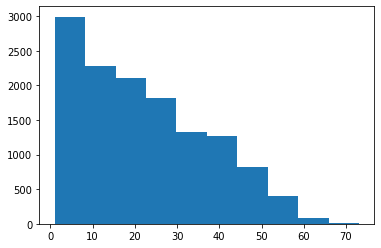

In [336]:
import statistics
print("Povprečna izkušnja voznika:",statistics.mean(stopnjeZnanjaVoznika))
plt.hist(stopnjeZnanjaVoznika)

Povprečna količina alko testa: 0.017250193648334626


(array([1245.,    5.,    6.,    9.,    7.,    8.,    6.,    0.,    3.,
           2.]),
 array([0.   , 0.103, 0.206, 0.309, 0.412, 0.515, 0.618, 0.721, 0.824,
        0.927, 1.03 ]),
 <BarContainer object of 10 artists>)

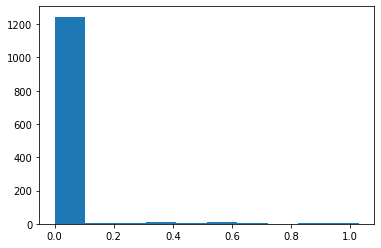

In [337]:
print("Povprečna količina alko testa:",statistics.mean(alkoVrednosti))
plt.hist(alkoVrednosti)

Povprečna starost: 43.90660705414804


(array([  42.,  558., 3367., 3059., 2591., 2538., 1947., 1282.,  647.,
          73.]),
 array([-1. ,  8.8, 18.6, 28.4, 38.2, 48. , 57.8, 67.6, 77.4, 87.2, 97. ]),
 <BarContainer object of 10 artists>)

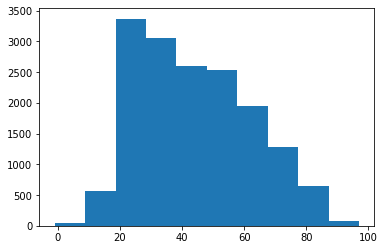

In [339]:
print("Povprečna starost:",statistics.mean(starostiPovzrociteljev))
plt.hist(starostiPovzrociteljev)